# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [114]:
#Import all the necessary modules
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [115]:
wine_df= pd.read_csv('winequality-red.csv')
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [116]:
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [117]:
wine_df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [118]:
wine_df.shape

(1599, 12)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [119]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


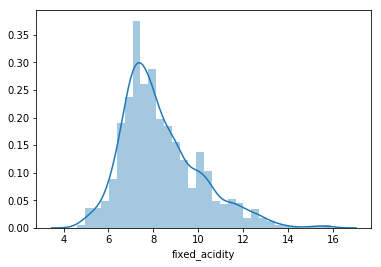

In [120]:
sns.distplot(wine_df['fixed_acidity'],kde=True)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


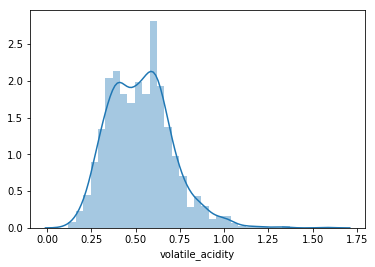

In [121]:
sns.distplot(wine_df['volatile_acidity'],kde=True)
#according to the below plot, volatile_acidity is a mixture of gaussians.

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


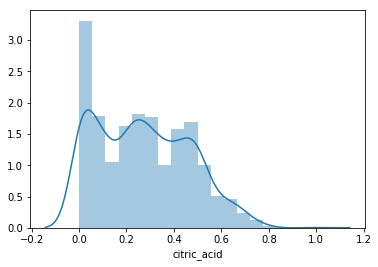

In [122]:
sns.distplot(wine_df['citric_acid'],kde=True)
#citric_acid attribute is aslo a mixture of gaussians

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


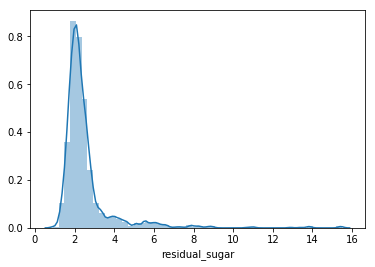

In [123]:
sns.distplot(wine_df['residual_sugar'],kde=True)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


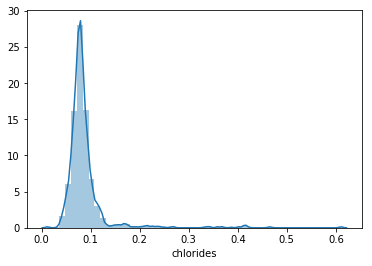

In [124]:
sns.distplot(wine_df['chlorides'],kde=True)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


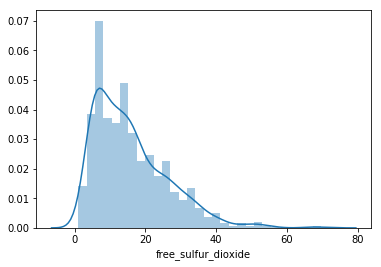

In [125]:
sns.distplot(wine_df['free_sulfur_dioxide'],kde=True)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


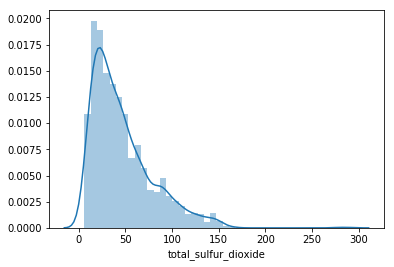

In [126]:
sns.distplot(wine_df['total_sulfur_dioxide'],kde=True)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


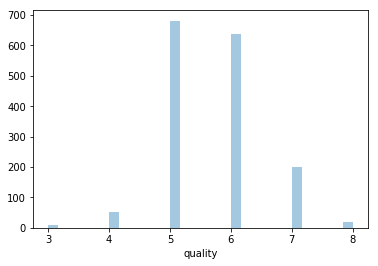

In [127]:
sns.distplot(wine_df['quality'],kde=False)

from the above plots volatile_acidity and citri_acid are mixture of gaussians.
free_sulphur_dioxide and total_siulphur_dioxide are right skewed and has right tails.
most of the records have the quality of wine with 5 and 6

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


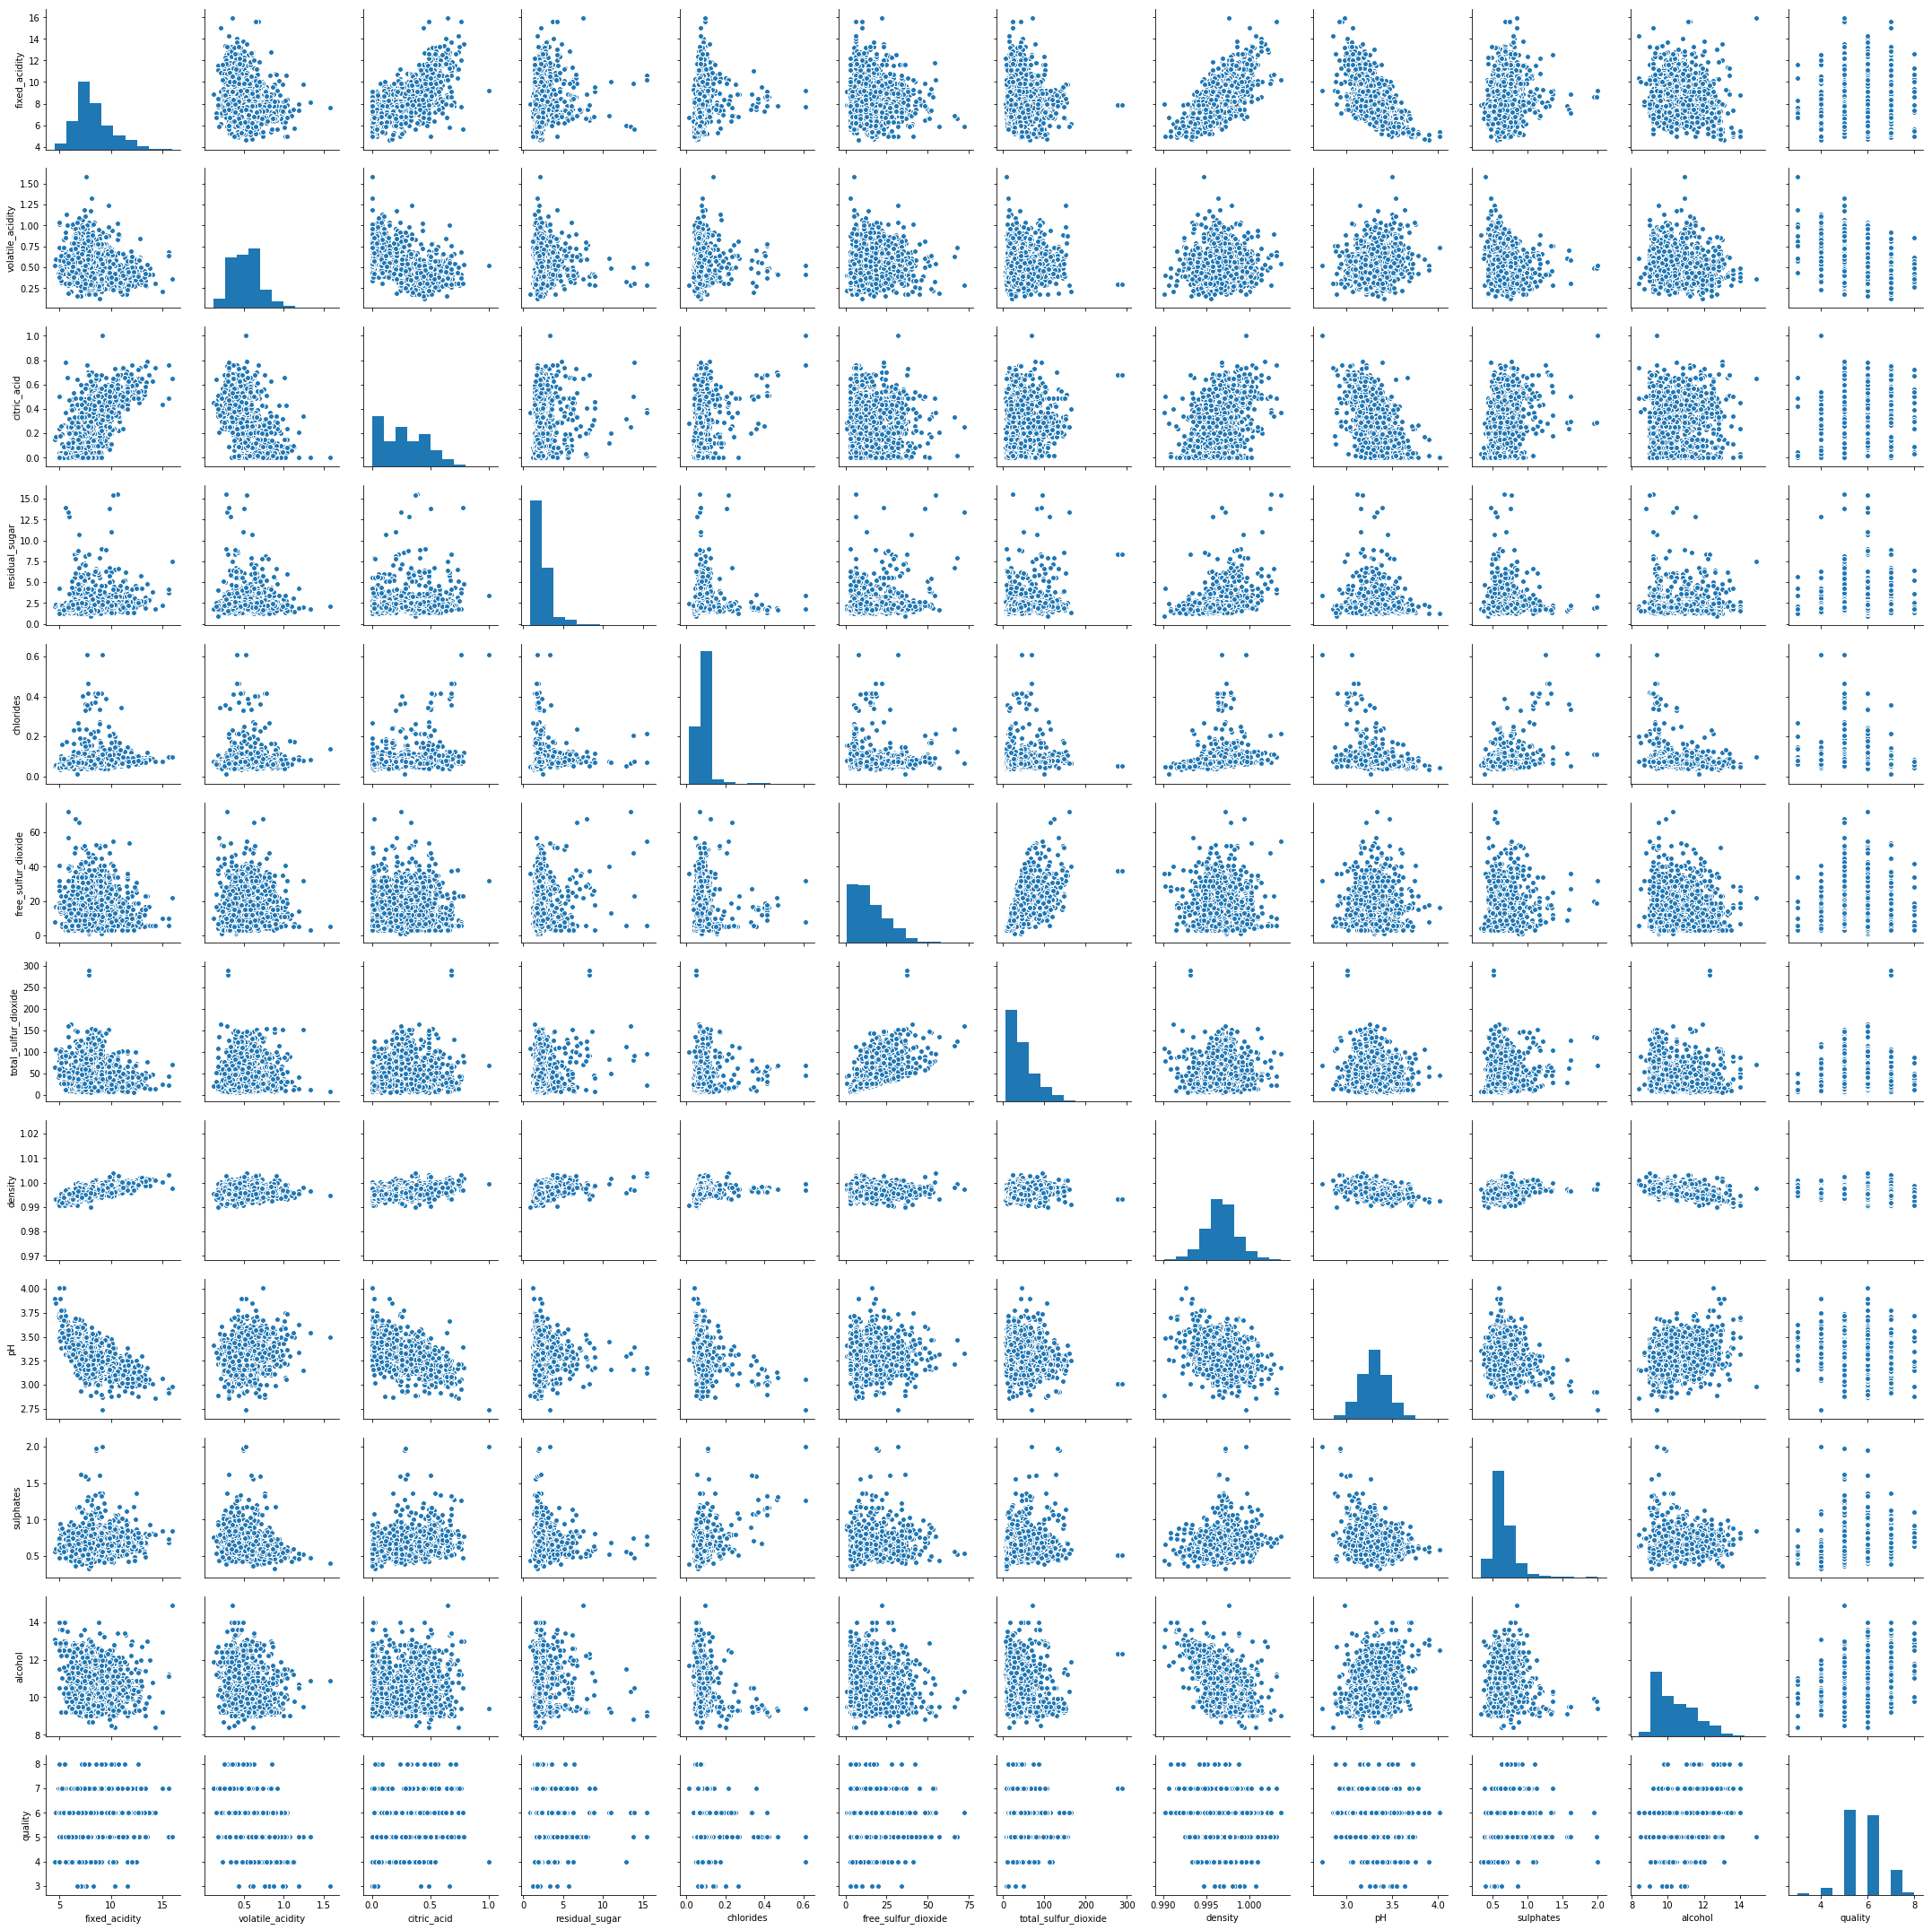

In [128]:
sns.pairplot(wine_df)

In [129]:
wine_df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


volatile_acidity,chlorides and density are negatively correlated with quality.hence increase in volatile acidity reduces the quality of wine.
volatile-acidity and citrix_acid are negatively correlated.
ph is negatively correlated with both fixed_acidity, citri_acid.


# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [336]:
x_train,x_test,y_train,y_test= train_test_split(wine_df.iloc[:,0:11],wine_df.iloc[:,-1],test_size=0.3,random_state=100)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [337]:
decision_tree=DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [338]:
y_predict = decision_tree.predict(x_test)

# Q9 Print the accuracy of the model & print the confusion matrix 

In [339]:
print(decision_tree.score(x_test,y_test))

0.60625


In [340]:
print(metrics.confusion_matrix(y_predict,y_test))

[[  0   1   0   0   0   0]
 [  0   1   8   5   2   0]
 [  2   9 144  47   3   0]
 [  1   4  46 118  23   2]
 [  0   2   6  21  28   2]
 [  0   0   0   2   3   0]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [487]:
x_train,x_test,y_train,y_test= train_test_split(wine_df.iloc[:,0:11],wine_df.iloc[:,-1],test_size=0.3,random_state=7)

In [488]:
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size=0.2,random_state=7)

In [489]:
regularised_decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=40)
regularised_decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [490]:
print(decision_tree.score(x_val,y_val))

0.9151785714285714


In [491]:
print(decision_tree.score(x_test,y_test))
#

0.8666666666666667


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [506]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test= train_test_split(wine_df.iloc[:,0:11],wine_df.iloc[:,-1],test_size=0.3,random_state=7)
rfcl = RandomForestClassifier(n_estimators = 85)
rfcl = rfcl.fit(x_train, y_train)
rfcl.score(x_test , y_test)

0.6708333333333333

In [507]:
y_predict = rfcl.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[  0   0   1   0   0   0]
 [  1   0  13   6   2   0]
 [  0   0 145  42   2   0]
 [  0   0  40 149  16   0]
 [  0   0   3  28  27   0]
 [  0   0   0   2   2   1]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [508]:
from sklearn.ensemble import AdaBoostClassifier
adaBoostClassifier=AdaBoostClassifier(base_estimator=decision_tree , n_estimators=50)
adaBoostClassifier.fit(x_train,y_train)
print(adaBoostClassifier.score(x_test,y_test))

0.6041666666666666


In [509]:
y_predict = adaBoostClassifier.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[  0   0   1   0   0   0]
 [  0   2  12   7   1   0]
 [  0   1 135  46   7   0]
 [  0   3  49 122  29   2]
 [  0   0   4  22  29   3]
 [  0   0   0   2   1   2]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [511]:
from sklearn.ensemble import BaggingClassifier
baggingClassifier= BaggingClassifier(base_estimator= decision_tree, n_estimators=50)
baggingClassifier.fit(x_train,y_train)
print(baggingClassifier.score(x_test,y_test))

0.6729166666666667


In [513]:
y_predict=baggingClassifier.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[  0   0   1   0   0   0]
 [  1   0  16   3   2   0]
 [  0   1 146  40   2   0]
 [  0   0  41 145  18   1]
 [  0   0   2  25  31   0]
 [  0   0   0   2   2   1]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [514]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoostingClassifier= GradientBoostingClassifier(n_estimators= 50 )
gradientBoostingClassifier.fit(x_train,y_train)
print(gradientBoostingClassifier.score(x_test,y_test))

0.65


In [515]:
y_predict=gradientBoostingClassifier.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[  0   0   1   0   0   0]
 [  0   3  13   5   1   0]
 [  0   2 137  45   4   1]
 [  0   4  43 142  15   1]
 [  0   0   1  28  29   0]
 [  0   0   0   3   1   1]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [517]:
from sklearn.ensemble import VotingClassifier
#eclf1 = VotingClassifier(estimators=[
#         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
votingClassifier= VotingClassifier(estimators=[('lr',rfcl),('ada',adaBoostClassifier),('bc',baggingClassifier)
                                              ])
votingClassifier.fit(x_train,y_train,sample_weight=None)

VotingClassifier(estimators=[('lr', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_we...estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [518]:
votingClassifier.score(x_test,y_test)

C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6708333333333333

In [520]:
y_predict=votingClassifier.predict(x_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[  0   0   1   0   0   0]
 [  1   0  16   4   1   0]
 [  0   2 144  41   2   0]
 [  0   1  44 144  15   1]
 [  0   0   4  21  33   0]
 [  0   0   0   2   2   1]]


C:\Users\Sri Harika\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
